# Heart Disease Prediction Using Machine Learning

## Import Python libraries

In [1]:
import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

## Import dataset

In [2]:
# Load the dataset 
url = "https://github.com/abdelDebug/Heart-Disease-Data/raw/main/heart_disease.csv"
data = pd.read_csv(url)
# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(data.head())

First 5 rows of the dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   0       145   233    1        2      150      0      2.3      2   
1   67    1   3       160   286    0        2      108      1      1.5      1   
2   67    1   3       120   229    0        2      129      1      2.6      1   
3   37    1   2       130   250    0        0      187      0      3.5      2   
4   41    0   1       130   204    0        2      172      0      1.4      0   

   ca  thal  target  
0   0     2       0  
1   3     1       1  
2   2     3       1  
3   0     1       0  
4   0     1       0  


## Dats description 

In [3]:
# Display the summary of the dataset
data.info()
# Descriptive statistics
print("\nDescriptive Statistics:")
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB

Descriptive Statistics:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868   

## 1. Data Preprocessing

### Investigate and Impute Missing Data

In [4]:
# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())



Missing values in each column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


### EDA

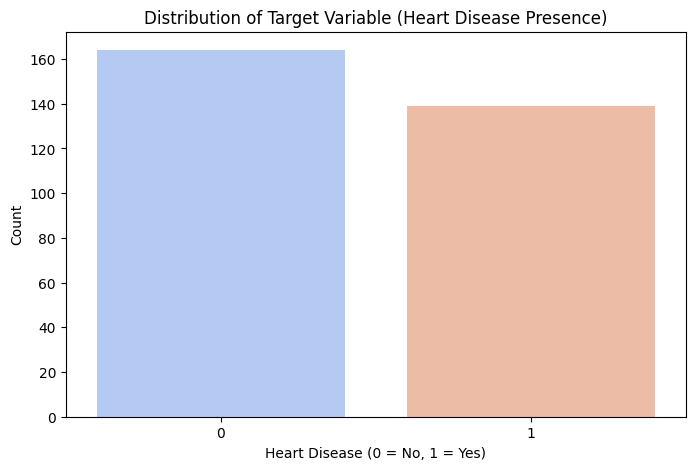

target
0    0.541254
1    0.458746
Name: proportion, dtype: float64


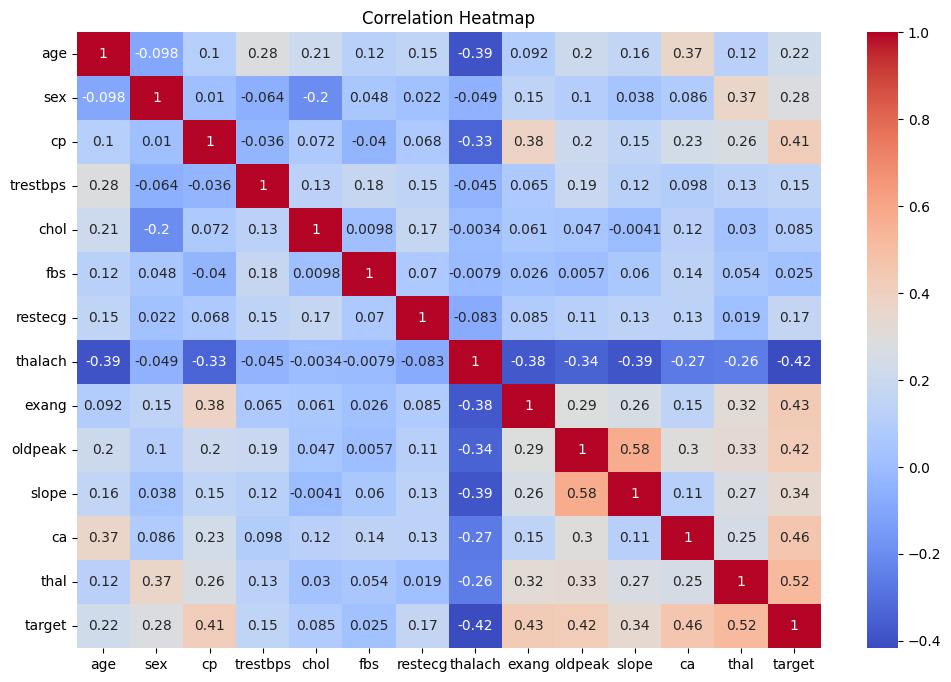


Correlation Matrix:
               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.097542  0.104139  0.284946  0.208950  0.118530   
sex      -0.097542  1.000000  0.010084 -0.064456 -0.199915  0.047862   
cp        0.104139  0.010084  1.000000 -0.036077  0.072319 -0.039975   
trestbps  0.284946 -0.064456 -0.036077  1.000000  0.130120  0.175340   
chol      0.208950 -0.199915  0.072319  0.130120  1.000000  0.009841   
fbs       0.118530  0.047862 -0.039975  0.175340  0.009841  1.000000   
restecg   0.148868  0.021647  0.067505  0.146560  0.171043  0.069564   
thalach  -0.393806 -0.048663 -0.334422 -0.045351 -0.003432 -0.007854   
exang     0.091661  0.146201  0.384060  0.064762  0.061310  0.025665   
oldpeak   0.203805  0.102173  0.202277  0.189171  0.046564  0.005747   
slope     0.161770  0.037533  0.152050  0.117382 -0.004062  0.059894   
ca        0.365323  0.086048  0.233117  0.097528  0.123726  0.140764   
thal      0.122300  0.367911  0.259835  0.1

In [5]:
# EDA: Visualizing the distribution of target variable
plt.figure(figsize=(8, 5))
sns.countplot(x='target', data=data, palette='coolwarm')
plt.title("Distribution of Target Variable (Heart Disease Presence)")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()
# Check balance of target variable (class distribution)
class_distribution = data['target'].value_counts(normalize=True)
print(class_distribution)
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Print the correlation matrix
print("\nCorrelation Matrix:")
print(data.corr())

### Apply Scaling Techniques

In [6]:
# Apply StandardScaler for normalization
scaler_standard = StandardScaler()
data_standard_scaled = scaler_standard.fit_transform(data.drop(columns=['target']))
data_standard_scaled = pd.DataFrame(data_standard_scaled, columns=data.columns[:-1])
data_standard_scaled['target'] = data['target']

print("\nFirst 5 rows of the dataset after StandardScaler normalization:")
print(data_standard_scaled.head())

# Apply MinMaxScaler for normalization
scaler_minmax = MinMaxScaler()
data_minmax_scaled = scaler_minmax.fit_transform(data.drop(columns=['target']))
data_minmax_scaled = pd.DataFrame(data_minmax_scaled, columns=data.columns[:-1])
data_minmax_scaled['target'] = data['target']

print("\nFirst 5 rows of the dataset after MinMaxScaler normalization:")
print(data_minmax_scaled.head())


First 5 rows of the dataset after StandardScaler normalization:
        age       sex        cp  trestbps      chol       fbs   restecg  \
0  0.948726  0.686202 -2.251775  0.757525 -0.264900  2.394438  1.016684   
1  1.392002  0.686202  0.877985  1.611220  0.760415 -0.417635  1.016684   
2  1.392002  0.686202  0.877985 -0.665300 -0.342283 -0.417635  1.016684   
3 -1.932564  0.686202 -0.165268 -0.096170  0.063974 -0.417635 -0.996749   
4 -1.489288 -1.457296 -1.208521 -0.096170 -0.825922 -0.417635  1.016684   

    thalach     exang   oldpeak     slope        ca      thal  target  
0  0.017197 -0.696631  1.087338  2.274579 -0.711131  0.176225       0  
1 -1.821905  1.435481  0.397182  0.649113  2.504881 -0.870759       1  
2 -0.902354  1.435481  1.346147  0.649113  1.432877  1.223208       1  
3  1.637359 -0.696631  2.122573  2.274579 -0.711131 -0.870759       0  
4  0.980537 -0.696631  0.310912 -0.976352 -0.711131 -0.870759       0  

First 5 rows of the dataset after MinMaxScaler norm

## 2. Model Selection and Training

### Choose a Suitable Model and Splitting the dataset

In [7]:
# Split the dataset into training (80%) and testing (20%) sets
X = data.drop(columns=['target'])  # Features
y = data['target']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Train the Model

In [8]:
# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300, 400],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required at each leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider for the best split
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters from GridSearchCV
best_params = grid_search.best_params_
print("\nBest Hyperparameters found by GridSearchCV:")
print(best_params)

# Re-train the RandomForest model with the best hyperparameters
rf_model_tuned = grid_search.best_estimator_

Fitting 5 folds for each of 864 candidates, totalling 4320 fits

Best Hyperparameters found by GridSearchCV:
{'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}


## 3. Model Evaluation and Visualization:
### Evaluate the Model

In [9]:
# Predictions on the test set
y_pred_rf_tuned = rf_model_tuned.predict(X_test)


Classification Report for Tuned Random Forest Model:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91        33
           1       0.87      0.93      0.90        28

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61


Confusion Matrix for Tuned Random Forest Model:
[[29  4]
 [ 2 26]]


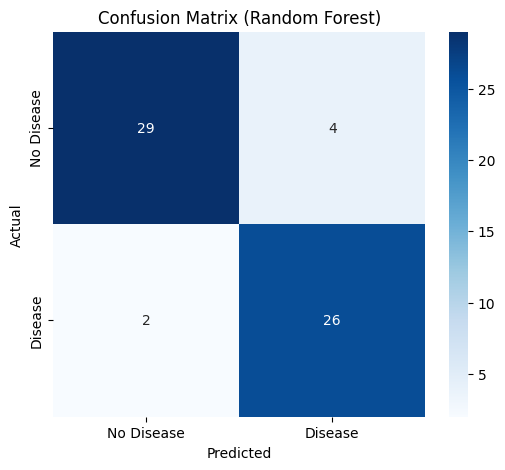

In [11]:
# Model Evaluation: Evaluate the performance of the tuned model
print("\nClassification Report for Tuned Random Forest Model:")
print(classification_report(y_test, y_pred_rf_tuned))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf_tuned)
print("\nConfusion Matrix for Tuned Random Forest Model:")
print(conf_matrix)

# Visualize the confusion matrix for Random Forest
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title("Confusion Matrix (Random Forest)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### ROC Curve and AUC


ROC-AUC Score: 0.9535


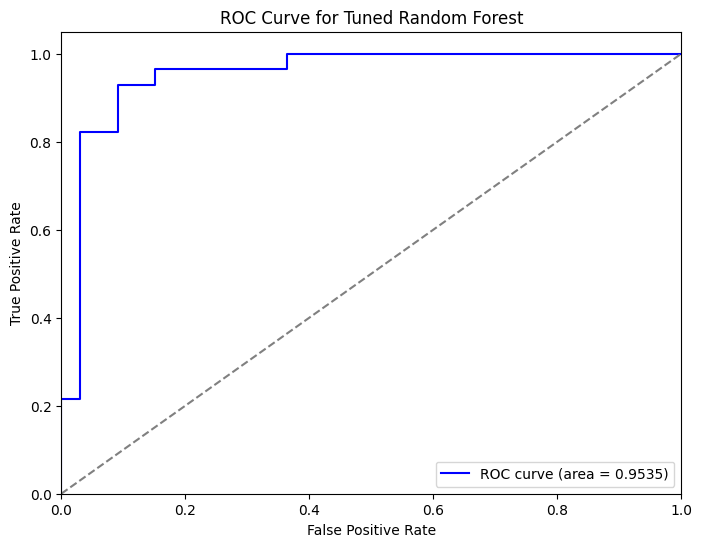

In [12]:
# ROC-AUC Score
roc_auc = roc_auc_score(y_test, rf_model_tuned.predict_proba(X_test)[:, 1])
print(f"\nROC-AUC Score: {roc_auc:.4f}")

# Plotting ROC Curve
fpr, tpr, _ = roc_curve(y_test, rf_model_tuned.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Tuned Random Forest')
plt.legend(loc='lower right')
plt.show()